In [1]:
# Imports
from random import *
import pandas as pd
    
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.externals import joblib
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

import dateutil.parser as dateparser
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix

import itertools

from sklearn.utils import resample

from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

import time

from sklearn.base import clone as cloneClassifier

ModuleNotFoundError: No module named 'pydotplus'

In [2]:
import requests

parlamentares = {}

for vote_id in range(3510,3520):
#vote_id = 1
    print('vote_id = ',str(vote_id))
    for i in range (1,7):
        r = requests.get('https://dadosabertos.camara.leg.br/api/v2/votacoes/'+str(vote_id)+'/votos?&itens=100&pagina='+str(i))
        x = r.json()
        if len(x['dados']) > 0:
            print('->votes: ',str(len(x['dados'])))
            for parlamentar in x['dados']:
                if parlamentar['parlamentar']['id'] not in parlamentares:
                    parlamentares[parlamentar['parlamentar']['id']] = {'nome' : parlamentar['parlamentar']['nome'], 'partido' : parlamentar['parlamentar']['siglaPartido'], 'uf'  : parlamentar['parlamentar']['siglaUf']}
                parlamentares[parlamentar['parlamentar']['id']][str(vote_id)] = parlamentar['voto']

parlamentares

vote_id =  3510
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13
vote_id =  3511
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13
vote_id =  3512
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13
vote_id =  3513
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13
vote_id =  3514
vote_id =  3515
vote_id =  3516
vote_id =  3517
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13
vote_id =  3518
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13
vote_id =  3519
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  100
->votes:  13


{4927: {'3510': 'null',
  '3511': 'Obstrução',
  '3512': 'Obstrução',
  '3513': 'null',
  '3517': 'Sim',
  '3518': 'Sim',
  '3519': 'null',
  'nome': 'JORGINHO MALULY',
  'partido': 'DEM',
  'uf': 'SP'},
 4928: {'3510': 'null',
  '3511': 'Não',
  '3512': 'null',
  '3513': 'Não',
  '3517': 'Sim',
  '3518': 'Sim',
  '3519': 'null',
  'nome': 'EDUARDO LOPES',
  'partido': 'PSB',
  'uf': 'RJ'},
 4930: {'3510': 'null',
  '3511': 'null',
  '3512': 'null',
  '3513': 'Não',
  '3517': 'Sim',
  '3518': 'Sim',
  '3519': 'null',
  'nome': 'SILVIO COSTA',
  'partido': 'PMN',
  'uf': 'PE'},
 64960: {'3510': 'null',
  '3511': 'Não',
  '3512': 'Não',
  '3513': 'Não',
  '3517': 'null',
  '3518': 'Sim',
  '3519': 'null',
  'nome': 'MARIA HELENA',
  'partido': 'PSB',
  'uf': 'RR'},
 73416: {'3510': 'null',
  '3511': 'null',
  '3512': 'Não',
  '3513': 'null',
  '3517': 'null',
  '3518': 'null',
  '3519': 'null',
  'nome': 'NELSON BORNIER',
  'partido': 'PMDB',
  'uf': 'RJ'},
 73424: {'3510': 'Não',
  '351

In [3]:
len(parlamentares)

513

In [4]:
vote_id = 2

r = requests.get('https://dadosabertos.camara.leg.br/api/v2/votacoes/3512/')#3512
x = r.json()
x

{'dados': {'aprovada': None,
  'dataHoraFim': '2008-12-02 18:59:14.0',
  'dataHoraInicio': '2008-12-02 14:00:32.0',
  'despacho': None,
  'ementaParecer': None,
  'id': 3512,
  'numPresentes': None,
  'numVotantes': None,
  'orientacoes': [{'nomeBancada': 'PmdbPtc',
    'uriBancada': 'https://dadosabertos.camara.leg.br/api/v2/bancada/1',
    'voto': 'Não'},
   {'nomeBancada': 'PT',
    'uriBancada': 'https://dadosabertos.camara.leg.br/api/v2/bancada/1',
    'voto': 'Não'},
   {'nomeBancada': 'PsbPdtPCdoBPmnPrb',
    'uriBancada': 'https://dadosabertos.camara.leg.br/api/v2/bancada/1',
    'voto': 'Não'},
   {'nomeBancada': 'PSDB',
    'uriBancada': 'https://dadosabertos.camara.leg.br/api/v2/bancada/1',
    'voto': 'Obstrução'},
   {'nomeBancada': 'DEM',
    'uriBancada': 'https://dadosabertos.camara.leg.br/api/v2/bancada/1',
    'voto': 'Obstrução'},
   {'nomeBancada': 'PR',
    'uriBancada': 'https://dadosabertos.camara.leg.br/api/v2/bancada/1',
    'voto': 'Não'},
   {'nomeBancada': '

In [2]:
def getVotes(vote_id, parlamentares):
    for i in range (1,7):
            r = requests.get('https://dadosabertos.camara.leg.br/api/v2/votacoes/'+str(vote_id)+'/votos?&itens=100&pagina='+str(i))
            x = r.json()
            if len(x['dados']) > 0:
                #print('->votes: ',str(len(x['dados'])))
                for parlamentar in x['dados']:
                    if parlamentar['parlamentar']['id'] not in parlamentares:
                        parlamentares[parlamentar['parlamentar']['id']] = {'nome' : parlamentar['parlamentar']['nome'], 'partido' : parlamentar['parlamentar']['siglaPartido'], 'uf'  : parlamentar['parlamentar']['siglaUf']}
                    parlamentares[parlamentar['parlamentar']['id']][str(vote_id)] = parlamentar['voto']
    return parlamentares

In [15]:
proposicoes_2015_2018 = []
currPage = 1
lastPage = None
isLastPage = False

while isLastPage == False:
    #r = requests.get('https://dadosabertos.camara.leg.br/api/v2/proposicoes?siglaTipo=&ano=2015&ano=2016&ano=2017&ano=2018&idSituacao=1140&ordem=ASC&ordenarPor=id&itens=300&pagina='+str(currPage))
    r = requests.get('https://dadosabertos.camara.leg.br/api/v2/proposicoes?siglaTipo=&ano=2018&idSituacao=1140&ordem=ASC&ordenarPor=id&itens=100&pagina='+str(currPage))
    x = r.json()
    #print(x)
    proposicoes = x
    if lastPage == None:
        lastPage = int(proposicoes['links'][-1]['href'].find('pagina='))
        print('last page: ',lastPage)
    prop_count = len(proposicoes['dados'])
    if len(proposicoes_2015_2018) == 0:
        proposicoes_2015_2018 = proposicoes['dados']
    else:
        proposicoes_2015_2018.extend(proposicoes['dados'])
    #print(prop_count)
    #print(len(proposicoes_2015_2018))
    print(currPage)
    if (prop_count<100) or (('pagina='+str(currPage)) in proposicoes['links'][-1]['href'] or currPage==lastPage):
        isLastPage = True
    currPage = currPage + 1
    
proposicoes_2015_2018

last page:  114
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


[{'ano': 2018,
  'ementa': 'Disciplina o disposto nas Emendas Constitucionais nº 60, de 11 de novembro de 2009, nº 79, de 27 de maio de 2014, e nº 98, de 6 de dezembro de 2017, dispõe sobre as tabelas de salários, vencimentos, soldos e demais vantagens aplicáveis aos servidores civis, aos militares e aos empregados dos ex-Territórios Federais, integrantes do quadro em extinção de que trata o art. 89 do Ato das Disposições Constitucionais Transitórias e o art. 31 da Emenda Constitucional nº 19, de 4 de junho de 1998, e dá outras providências.',
  'id': 2167556,
  'idTipo': 291,
  'numero': 817,
  'siglaTipo': 'MPV       ',
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/proposicoes/2167556'},
 {'ano': 2018,
  'ementa': 'Comunica o Excelentíssimo Senhor Presidente da República, a sanção do projeto de lei que "Autoriza o Fundo de Garantia do Tempo de Serviço (FGTS) a adquirir da Caixa Econômica Federal instrumento de dívida para enquadramento no nível 1 do Patrimônio de Referência; ac

In [16]:
len(proposicoes_2015_2018)

9824

In [17]:
parlamentares = {}

for proposicao in proposicoes_2015_2018[::-1]:
    #proposicao = proposicoes_2017[9]
    if 'id' in proposicao:
        print('prop: '+str(proposicao['id'])+" from "+str(proposicao['ano']))
        r = requests.get('https://dadosabertos.camara.leg.br/api/v2/proposicoes/'+str(proposicao['id'])+'/votacoes')
        votacoes = r.json()
        #votacoes
        if 'dados' in votacoes:
            for votacao in votacoes['dados']:
                votacao_id = votacao['id']
                print('vote id: '+str(votacao_id))
                #r = requests.get('https://dadosabertos.camara.leg.br/api/v2/votacoes/'+str(votacao_id)+'/votos')
                #votos = r.json()
                getVotes(votacao_id, parlamentares)

prop: 2187052 from 2018
prop: 2187047 from 2018
prop: 2187044 from 2018
prop: 2187043 from 2018
prop: 2187042 from 2018
prop: 2187041 from 2018
prop: 2187040 from 2018
prop: 2187039 from 2018
prop: 2187038 from 2018
prop: 2187037 from 2018
prop: 2187035 from 2018
prop: 2187034 from 2018
prop: 2187033 from 2018
prop: 2187020 from 2018
prop: 2187012 from 2018
prop: 2187011 from 2018
prop: 2187008 from 2018
prop: 2186997 from 2018
prop: 2186996 from 2018
prop: 2186995 from 2018
prop: 2186994 from 2018
prop: 2186986 from 2018
prop: 2186983 from 2018
prop: 2186982 from 2018
prop: 2186969 from 2018
prop: 2186939 from 2018
prop: 2186920 from 2018
prop: 2186916 from 2018
prop: 2186913 from 2018
prop: 2186912 from 2018
prop: 2186906 from 2018
prop: 2186898 from 2018
prop: 2186892 from 2018
prop: 2186889 from 2018
prop: 2186887 from 2018
prop: 2186885 from 2018
prop: 2186884 from 2018
prop: 2186883 from 2018
prop: 2186882 from 2018
prop: 2186878 from 2018
prop: 2186873 from 2018
prop: 2186869 fr

prop: 2185904 from 2018
prop: 2185903 from 2018
prop: 2185902 from 2018
prop: 2185901 from 2018
prop: 2185900 from 2018
prop: 2185899 from 2018
prop: 2185898 from 2018
prop: 2185897 from 2018
prop: 2185896 from 2018
prop: 2185895 from 2018
prop: 2185894 from 2018
prop: 2185893 from 2018
prop: 2185892 from 2018
prop: 2185891 from 2018
prop: 2185890 from 2018
prop: 2185889 from 2018
prop: 2185888 from 2018
prop: 2185887 from 2018
prop: 2185886 from 2018
prop: 2185885 from 2018
prop: 2185884 from 2018
prop: 2185879 from 2018
prop: 2185875 from 2018
prop: 2185869 from 2018
prop: 2185868 from 2018
prop: 2185867 from 2018
prop: 2185865 from 2018
prop: 2185864 from 2018
prop: 2185863 from 2018
prop: 2185861 from 2018
prop: 2185858 from 2018
prop: 2185855 from 2018
prop: 2185851 from 2018
prop: 2185841 from 2018
prop: 2185840 from 2018
prop: 2185839 from 2018
prop: 2185838 from 2018
prop: 2185837 from 2018
prop: 2185836 from 2018
prop: 2185835 from 2018
prop: 2185834 from 2018
prop: 2185833 fr

prop: 2185531 from 2018
prop: 2185530 from 2018
prop: 2185529 from 2018
prop: 2185528 from 2018
prop: 2185527 from 2018
prop: 2185526 from 2018
prop: 2185525 from 2018
prop: 2185524 from 2018
prop: 2185523 from 2018
prop: 2185522 from 2018
prop: 2185521 from 2018
prop: 2185520 from 2018
prop: 2185519 from 2018
prop: 2185518 from 2018
prop: 2185517 from 2018
prop: 2185516 from 2018
prop: 2185515 from 2018
prop: 2185514 from 2018
prop: 2185513 from 2018
prop: 2185512 from 2018
prop: 2185511 from 2018
prop: 2185510 from 2018
prop: 2185509 from 2018
prop: 2185508 from 2018
prop: 2185507 from 2018
prop: 2185506 from 2018
prop: 2185505 from 2018
prop: 2185504 from 2018
prop: 2185503 from 2018
prop: 2185502 from 2018
prop: 2185501 from 2018
prop: 2185500 from 2018
prop: 2185499 from 2018
prop: 2185498 from 2018
prop: 2185497 from 2018
prop: 2185496 from 2018
prop: 2185495 from 2018
prop: 2185494 from 2018
prop: 2185493 from 2018
prop: 2185492 from 2018
prop: 2185491 from 2018
prop: 2185490 fr

prop: 2185019 from 2018
prop: 2185017 from 2018
prop: 2184990 from 2018
prop: 2184976 from 2018
prop: 2184975 from 2018
prop: 2184973 from 2018
prop: 2184970 from 2018
prop: 2184968 from 2018
prop: 2184965 from 2018
prop: 2184962 from 2018
prop: 2184957 from 2018
prop: 2184949 from 2018
prop: 2184948 from 2018
prop: 2184947 from 2018
prop: 2184946 from 2018
prop: 2184933 from 2018
prop: 2184930 from 2018
prop: 2184929 from 2018
prop: 2184928 from 2018
prop: 2184927 from 2018
prop: 2184924 from 2018
prop: 2184922 from 2018
prop: 2184921 from 2018
prop: 2184920 from 2018
prop: 2184919 from 2018
prop: 2184918 from 2018
prop: 2184917 from 2018
prop: 2184916 from 2018
prop: 2184915 from 2018
prop: 2184914 from 2018
prop: 2184913 from 2018
prop: 2184912 from 2018
prop: 2184911 from 2018
prop: 2184910 from 2018
prop: 2184908 from 2018
prop: 2184905 from 2018
prop: 2184901 from 2018
prop: 2184895 from 2018
prop: 2184893 from 2018
prop: 2184892 from 2018
prop: 2184889 from 2018
prop: 2184885 fr

prop: 2184261 from 2018
prop: 2184258 from 2018
prop: 2184256 from 2018
prop: 2184254 from 2018
prop: 2184252 from 2018
prop: 2184251 from 2018
prop: 2184250 from 2018
prop: 2184248 from 2018
prop: 2184247 from 2018
prop: 2184246 from 2018
prop: 2184245 from 2018
prop: 2184244 from 2018
prop: 2184243 from 2018
prop: 2184242 from 2018
prop: 2184241 from 2018
prop: 2184239 from 2018
prop: 2184238 from 2018
prop: 2184236 from 2018
prop: 2184229 from 2018
prop: 2184228 from 2018
prop: 2184225 from 2018
prop: 2184222 from 2018
prop: 2184221 from 2018
prop: 2184219 from 2018
prop: 2184218 from 2018
prop: 2184217 from 2018
prop: 2184214 from 2018
prop: 2184213 from 2018
prop: 2184212 from 2018
prop: 2184210 from 2018
prop: 2184209 from 2018
prop: 2184208 from 2018
prop: 2184207 from 2018
prop: 2184206 from 2018
prop: 2184203 from 2018
prop: 2184202 from 2018
prop: 2184201 from 2018
prop: 2184198 from 2018
prop: 2184197 from 2018
prop: 2184196 from 2018
prop: 2184195 from 2018
prop: 2184194 fr

prop: 2183692 from 2018
prop: 2183691 from 2018
prop: 2183690 from 2018
prop: 2183689 from 2018
prop: 2183688 from 2018
prop: 2183687 from 2018
prop: 2183686 from 2018
prop: 2183685 from 2018
prop: 2183684 from 2018
prop: 2183683 from 2018
prop: 2183682 from 2018
prop: 2183681 from 2018
prop: 2183680 from 2018
prop: 2183679 from 2018
prop: 2183678 from 2018
prop: 2183677 from 2018
prop: 2183676 from 2018
prop: 2183675 from 2018
prop: 2183674 from 2018
prop: 2183673 from 2018
prop: 2183672 from 2018
prop: 2183671 from 2018
prop: 2183670 from 2018
prop: 2183669 from 2018
prop: 2183668 from 2018
prop: 2183667 from 2018
prop: 2183666 from 2018
prop: 2183665 from 2018
prop: 2183664 from 2018
prop: 2183663 from 2018
prop: 2183662 from 2018
prop: 2183661 from 2018
prop: 2183660 from 2018
prop: 2183659 from 2018
prop: 2183658 from 2018
prop: 2183657 from 2018
prop: 2183656 from 2018
prop: 2183655 from 2018
prop: 2183654 from 2018
prop: 2183653 from 2018
prop: 2183652 from 2018
prop: 2183651 fr

prop: 2182935 from 2018
prop: 2182933 from 2018
prop: 2182928 from 2018
prop: 2182927 from 2018
prop: 2182926 from 2018
prop: 2182925 from 2018
prop: 2182924 from 2018
prop: 2182922 from 2018
prop: 2182919 from 2018
prop: 2182917 from 2018
prop: 2182916 from 2018
prop: 2182914 from 2018
prop: 2182913 from 2018
prop: 2182912 from 2018
prop: 2182911 from 2018
prop: 2182910 from 2018
prop: 2182909 from 2018
prop: 2182908 from 2018
prop: 2182907 from 2018
prop: 2182903 from 2018
prop: 2182900 from 2018
prop: 2182896 from 2018
prop: 2182895 from 2018
prop: 2182894 from 2018
prop: 2182893 from 2018
prop: 2182892 from 2018
prop: 2182891 from 2018
prop: 2182890 from 2018
prop: 2182889 from 2018
prop: 2182888 from 2018
prop: 2182887 from 2018
prop: 2182886 from 2018
prop: 2182885 from 2018
prop: 2182884 from 2018
prop: 2182883 from 2018
prop: 2182882 from 2018
prop: 2182881 from 2018
prop: 2182880 from 2018
prop: 2182879 from 2018
prop: 2182878 from 2018
prop: 2182877 from 2018
prop: 2182876 fr

prop: 2182350 from 2018
prop: 2182349 from 2018
prop: 2182348 from 2018
prop: 2182347 from 2018
prop: 2182346 from 2018
prop: 2182345 from 2018
prop: 2182344 from 2018
prop: 2182343 from 2018
prop: 2182342 from 2018
prop: 2182339 from 2018
prop: 2182338 from 2018
prop: 2182337 from 2018
prop: 2182336 from 2018
prop: 2182330 from 2018
prop: 2182327 from 2018
prop: 2182324 from 2018
prop: 2182315 from 2018
prop: 2182311 from 2018
prop: 2182310 from 2018
prop: 2182298 from 2018
prop: 2182297 from 2018
prop: 2182289 from 2018
prop: 2182288 from 2018
prop: 2182287 from 2018
prop: 2182286 from 2018
prop: 2182285 from 2018
prop: 2182284 from 2018
prop: 2182283 from 2018
prop: 2182282 from 2018
prop: 2182281 from 2018
prop: 2182280 from 2018
prop: 2182277 from 2018
prop: 2182275 from 2018
prop: 2182265 from 2018
prop: 2182264 from 2018
prop: 2182263 from 2018
prop: 2182259 from 2018
prop: 2182251 from 2018
prop: 2182250 from 2018
prop: 2182249 from 2018
prop: 2182248 from 2018
prop: 2182247 fr

prop: 2181488 from 2018
prop: 2181474 from 2018
prop: 2181472 from 2018
prop: 2181467 from 2018
prop: 2181465 from 2018
prop: 2181464 from 2018
prop: 2181459 from 2018
prop: 2181458 from 2018
prop: 2181457 from 2018
prop: 2181456 from 2018
prop: 2181453 from 2018
prop: 2181449 from 2018
prop: 2181448 from 2018
prop: 2181447 from 2018
prop: 2181446 from 2018
prop: 2181445 from 2018
prop: 2181444 from 2018
prop: 2181443 from 2018
prop: 2181442 from 2018
prop: 2181441 from 2018
prop: 2181438 from 2018
prop: 2181428 from 2018
prop: 2181425 from 2018
prop: 2181423 from 2018
prop: 2181422 from 2018
prop: 2181416 from 2018
prop: 2181415 from 2018
prop: 2181414 from 2018
prop: 2181412 from 2018
prop: 2181410 from 2018
prop: 2181407 from 2018
prop: 2181406 from 2018
prop: 2181401 from 2018
prop: 2181400 from 2018
prop: 2181398 from 2018
prop: 2181392 from 2018
prop: 2181391 from 2018
prop: 2181390 from 2018
prop: 2181387 from 2018
prop: 2181386 from 2018
prop: 2181385 from 2018
prop: 2181382 fr

prop: 2180718 from 2018
prop: 2180716 from 2018
prop: 2180713 from 2018
prop: 2180712 from 2018
prop: 2180711 from 2018
prop: 2180710 from 2018
vote id: 8482
prop: 2180703 from 2018
prop: 2180702 from 2018
prop: 2180699 from 2018
prop: 2180698 from 2018
prop: 2180696 from 2018
prop: 2180694 from 2018
prop: 2180693 from 2018
prop: 2180692 from 2018
prop: 2180691 from 2018
prop: 2180690 from 2018
prop: 2180688 from 2018
prop: 2180687 from 2018
prop: 2180686 from 2018
prop: 2180685 from 2018
prop: 2180684 from 2018
prop: 2180683 from 2018
prop: 2180680 from 2018
prop: 2180677 from 2018
prop: 2180676 from 2018
prop: 2180648 from 2018
prop: 2180646 from 2018
prop: 2180644 from 2018
prop: 2180642 from 2018
prop: 2180641 from 2018
prop: 2180640 from 2018
prop: 2180639 from 2018
prop: 2180638 from 2018
prop: 2180637 from 2018
prop: 2180636 from 2018
prop: 2180635 from 2018
prop: 2180633 from 2018
prop: 2180632 from 2018
prop: 2180631 from 2018
prop: 2180630 from 2018
prop: 2180629 from 2018
pr

prop: 2179974 from 2018
prop: 2179972 from 2018
prop: 2179968 from 2018
prop: 2179965 from 2018
prop: 2179964 from 2018
prop: 2179963 from 2018
prop: 2179962 from 2018
prop: 2179961 from 2018
prop: 2179960 from 2018
prop: 2179958 from 2018
prop: 2179957 from 2018
prop: 2179956 from 2018
prop: 2179955 from 2018
prop: 2179954 from 2018
prop: 2179953 from 2018
prop: 2179952 from 2018
prop: 2179951 from 2018
prop: 2179950 from 2018
prop: 2179949 from 2018
prop: 2179944 from 2018
prop: 2179939 from 2018
prop: 2179936 from 2018
prop: 2179935 from 2018
prop: 2179934 from 2018
prop: 2179930 from 2018
prop: 2179925 from 2018
prop: 2179924 from 2018
prop: 2179923 from 2018
prop: 2179922 from 2018
prop: 2179921 from 2018
prop: 2179919 from 2018
prop: 2179918 from 2018
prop: 2179917 from 2018
prop: 2179909 from 2018
prop: 2179908 from 2018
prop: 2179907 from 2018
prop: 2179906 from 2018
prop: 2179902 from 2018
prop: 2179900 from 2018
prop: 2179898 from 2018
prop: 2179894 from 2018
prop: 2179893 fr

prop: 2179227 from 2018
prop: 2179226 from 2018
prop: 2179225 from 2018
prop: 2179223 from 2018
prop: 2179222 from 2018
prop: 2179221 from 2018
prop: 2179218 from 2018
prop: 2179216 from 2018
prop: 2179215 from 2018
prop: 2179214 from 2018
prop: 2179213 from 2018
prop: 2179206 from 2018
prop: 2179205 from 2018
prop: 2179204 from 2018
prop: 2179203 from 2018
prop: 2179201 from 2018
prop: 2179200 from 2018
prop: 2179199 from 2018
prop: 2179196 from 2018
prop: 2179194 from 2018
prop: 2179192 from 2018
prop: 2179191 from 2018
prop: 2179190 from 2018
prop: 2179189 from 2018
prop: 2179187 from 2018
prop: 2179178 from 2018
prop: 2179177 from 2018
prop: 2179175 from 2018
prop: 2179174 from 2018
prop: 2179172 from 2018
prop: 2179166 from 2018
prop: 2179164 from 2018
prop: 2179162 from 2018
prop: 2179161 from 2018
prop: 2179159 from 2018
prop: 2179158 from 2018
prop: 2179157 from 2018
prop: 2179156 from 2018
prop: 2179155 from 2018
prop: 2179154 from 2018
prop: 2179149 from 2018
prop: 2179120 fr

prop: 2178234 from 2018
prop: 2178233 from 2018
prop: 2178232 from 2018
prop: 2178222 from 2018
prop: 2178221 from 2018
prop: 2178220 from 2018
prop: 2178215 from 2018
prop: 2178212 from 2018
prop: 2178211 from 2018
prop: 2178210 from 2018
prop: 2178209 from 2018
prop: 2178208 from 2018
prop: 2178207 from 2018
prop: 2178206 from 2018
prop: 2178204 from 2018
prop: 2178203 from 2018
prop: 2178198 from 2018
prop: 2178196 from 2018
prop: 2178191 from 2018
prop: 2178190 from 2018
prop: 2178173 from 2018
prop: 2178172 from 2018
prop: 2178171 from 2018
prop: 2178170 from 2018
prop: 2178169 from 2018
prop: 2178168 from 2018
prop: 2178167 from 2018
prop: 2178165 from 2018
prop: 2178163 from 2018
prop: 2178157 from 2018
prop: 2178156 from 2018
prop: 2178155 from 2018
prop: 2178154 from 2018
prop: 2178153 from 2018
prop: 2178152 from 2018
prop: 2178151 from 2018
prop: 2178150 from 2018
prop: 2178148 from 2018
prop: 2178147 from 2018
prop: 2178145 from 2018
prop: 2178144 from 2018
prop: 2178143 fr

prop: 2177547 from 2018
prop: 2177545 from 2018
prop: 2177543 from 2018
prop: 2177542 from 2018
prop: 2177541 from 2018
prop: 2177539 from 2018
prop: 2177538 from 2018
prop: 2177537 from 2018
prop: 2177536 from 2018
prop: 2177535 from 2018
prop: 2177534 from 2018
prop: 2177533 from 2018
prop: 2177532 from 2018
prop: 2177528 from 2018
prop: 2177527 from 2018
prop: 2177525 from 2018
prop: 2177517 from 2018
prop: 2177511 from 2018
prop: 2177510 from 2018
prop: 2177509 from 2018
prop: 2177507 from 2018
prop: 2177506 from 2018
prop: 2177505 from 2018
prop: 2177504 from 2018
prop: 2177503 from 2018
prop: 2177502 from 2018
prop: 2177501 from 2018
prop: 2177500 from 2018
prop: 2177492 from 2018
prop: 2177490 from 2018
prop: 2177485 from 2018
prop: 2177484 from 2018
prop: 2177483 from 2018
prop: 2177482 from 2018
prop: 2177481 from 2018
prop: 2177480 from 2018
prop: 2177479 from 2018
prop: 2177478 from 2018
prop: 2177477 from 2018
prop: 2177476 from 2018
prop: 2177475 from 2018
prop: 2177474 fr

prop: 2177029 from 2018
prop: 2177027 from 2018
prop: 2177025 from 2018
prop: 2177023 from 2018
prop: 2177022 from 2018
prop: 2177020 from 2018
prop: 2177019 from 2018
prop: 2177012 from 2018
prop: 2177011 from 2018
prop: 2177000 from 2018
prop: 2176999 from 2018
prop: 2176989 from 2018
prop: 2176988 from 2018
prop: 2176987 from 2018
prop: 2176986 from 2018
prop: 2176983 from 2018
prop: 2176982 from 2018
prop: 2176981 from 2018
prop: 2176980 from 2018
prop: 2176979 from 2018
prop: 2176978 from 2018
prop: 2176977 from 2018
prop: 2176976 from 2018
prop: 2176974 from 2018
prop: 2176973 from 2018
prop: 2176971 from 2018
prop: 2176963 from 2018
prop: 2176956 from 2018
prop: 2176955 from 2018
prop: 2176954 from 2018
prop: 2176953 from 2018
prop: 2176952 from 2018
prop: 2176951 from 2018
prop: 2176950 from 2018
prop: 2176949 from 2018
prop: 2176947 from 2018
prop: 2176946 from 2018
prop: 2176945 from 2018
prop: 2176944 from 2018
prop: 2176942 from 2018
prop: 2176938 from 2018
prop: 2176932 fr

prop: 2176061 from 2018
prop: 2176052 from 2018
prop: 2176051 from 2018
prop: 2176050 from 2018
prop: 2176046 from 2018
prop: 2176041 from 2018
prop: 2176039 from 2018
prop: 2176037 from 2018
prop: 2176033 from 2018
prop: 2176032 from 2018
prop: 2176031 from 2018
prop: 2176030 from 2018
prop: 2176023 from 2018
prop: 2176022 from 2018
prop: 2176020 from 2018
prop: 2176019 from 2018
prop: 2176017 from 2018
prop: 2176016 from 2018
prop: 2176015 from 2018
prop: 2176014 from 2018
prop: 2176013 from 2018
prop: 2176012 from 2018
prop: 2176004 from 2018
prop: 2176002 from 2018
prop: 2175993 from 2018
prop: 2175991 from 2018
prop: 2175987 from 2018
prop: 2175979 from 2018
prop: 2175977 from 2018
prop: 2175976 from 2018
prop: 2175975 from 2018
prop: 2175974 from 2018
prop: 2175973 from 2018
prop: 2175970 from 2018
prop: 2175969 from 2018
prop: 2175968 from 2018
prop: 2175967 from 2018
prop: 2175965 from 2018
prop: 2175964 from 2018
prop: 2175963 from 2018
prop: 2175962 from 2018
prop: 2175961 fr

prop: 2175219 from 2018
prop: 2175218 from 2018
prop: 2175216 from 2018
prop: 2175213 from 2018
prop: 2175212 from 2018
prop: 2175211 from 2018
prop: 2175210 from 2018
prop: 2175209 from 2018
prop: 2175206 from 2018
prop: 2175205 from 2018
prop: 2175204 from 2018
prop: 2175202 from 2018
prop: 2175201 from 2018
prop: 2175200 from 2018
prop: 2175197 from 2018
prop: 2175196 from 2018
prop: 2175195 from 2018
prop: 2175194 from 2018
prop: 2175193 from 2018
prop: 2175192 from 2018
prop: 2175189 from 2018
prop: 2175188 from 2018
prop: 2175187 from 2018
prop: 2175186 from 2018
prop: 2175185 from 2018
prop: 2175181 from 2018
prop: 2175179 from 2018
prop: 2175177 from 2018
prop: 2175175 from 2018
prop: 2175174 from 2018
prop: 2175173 from 2018
prop: 2175172 from 2018
prop: 2175159 from 2018
prop: 2175157 from 2018
prop: 2175156 from 2018
prop: 2175155 from 2018
prop: 2175154 from 2018
prop: 2175153 from 2018
prop: 2175151 from 2018
prop: 2175150 from 2018
prop: 2175146 from 2018
prop: 2175145 fr

From cffi callback <function _verify_callback at 0x000000EC14DE5C80>:
Traceback (most recent call last):
  File "C:\Users\vntivan\AppData\Local\Continuum\anaconda3\lib\site-packages\OpenSSL\SSL.py", line 221, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='dadosabertos.camara.leg.br', port=443): Max retries exceeded with url: /api/v2/proposicoes/2174985/votacoes (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))

In [18]:
parlamentares

{4930: {'8408': 'Sim',
  '8448': 'null',
  '8482': 'null',
  '8483': 'null',
  '8492': 'null',
  '8493': 'null',
  '8494': 'null',
  '8495': 'null',
  '8496': 'null',
  '8498': 'null',
  '8500': 'null',
  '8508': 'null',
  '8513': 'null',
  '8514': 'null',
  '8515': 'null',
  '8516': 'null',
  '8538': 'null',
  '8553': 'null',
  '8554': 'null',
  '8559': 'Sim',
  '8563': 'Sim',
  '8569': 'Sim',
  '8572': 'Não',
  '8585': 'Sim',
  '8586': 'Sim',
  'nome': 'SILVIO COSTA',
  'partido': 'Avante',
  'uf': 'PE'},
 4931: {'8408': 'Sim',
  '8448': 'Sim',
  '8482': 'Sim',
  '8483': 'Sim',
  '8492': 'null',
  '8493': 'Não',
  '8494': 'Não',
  '8495': 'Não',
  '8496': 'Não',
  '8498': 'Sim',
  '8500': 'Sim',
  '8508': 'Não',
  '8513': 'null',
  '8514': 'Não',
  '8515': 'Não',
  '8516': 'Não',
  '8538': 'Sim',
  '8553': 'Não',
  '8554': 'Sim',
  '8559': 'Sim',
  '8563': 'Sim',
  '8569': 'Sim',
  '8572': 'Não',
  '8585': 'Sim',
  '8586': 'Sim',
  'nome': 'IZALCI LUCAS',
  'partido': 'PSDB',
  'uf':

In [19]:
df = pd.DataFrame(parlamentares).T

In [20]:
df

,8408,8448,8482,8483,8492,8493,8494,8495,8496,8498,...,8554,8559,8563,8569,8572,8585,8586,nome,partido,uf
4930,Sim,null,null,null,null,null,null,null,null,null,...,null,Sim,Sim,Sim,Não,Sim,Sim,SILVIO COSTA,Avante,PE
4931,Sim,Sim,Sim,Sim,null,Não,Não,Não,Não,Sim,...,Sim,Sim,Sim,Sim,Não,Sim,Sim,IZALCI LUCAS,PSDB,DF
62881,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Sim,...,Sim,Sim,Sim,Sim,null,Sim,Sim,DANILO FORTE,PSDB,CE
64960,Sim,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,...,Sim,Não,null,Sim,Não,Sim,Sim,MARIA HELENA,MDB,RR
66179,null,null,Sim,Não,Sim,Não,Não,Não,null,null,...,Sim,Não,Sim,null,Não,null,null,NORMA AYUB,DEM,ES
66828,null,Sim,Sim,Sim,null,null,Não,Não,Não,Sim,...,Sim,null,null,Sim,Não,null,Sim,FAUSTO PINATO,PP,SP
67138,null,null,null,null,Sim,null,null,null,null,null,...,null,null,null,null,null,Sim,Sim,IRACEMA PORTELLA,PP,PI
67312,null,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Sim,...,Sim,Não,null,null,null,Sim,Sim,JÚLIA MARINHO,PSC,PA
69871,Sim,null,Não,Não,Não,Sim,null,null,null,null,...,Não,Não,Sim,Não,Não,Sim,Não,BACELAR,Podemos,BA
72442,Sim,Sim,Obstrução,Obstrução,null,null,null,null,null,null,...,null,Não,Sim,Não,Não,Sim,Sim,FELIPE CARRERAS,PSB,PE


In [231]:
#df.to_csv('votos_deputados.csv')

In [4]:
df = pd.read_csv('votos_deputados.csv',encoding='ansi')

In [5]:
min_votes = 200

#(df[df.columns[:-3]]=='Sim') | (df[df.columns[:-3]]=='Não')
print(sum(df.apply(lambda x : sum((x=='Sim') | (x=='Não')), axis=1 ) > min_votes))
df = df[df.apply(lambda x : sum((x=='Sim') | (x=='Não')), axis=1 ) > min_votes]

322


In [6]:
train_data = pd.get_dummies(df[df.columns[:-3]], columns=df.columns[:-3])
train_data

,Unnamed: 0_4930.0,Unnamed: 0_4931.0,Unnamed: 0_62881.0,Unnamed: 0_64960.0,Unnamed: 0_66828.0,Unnamed: 0_67312.0,Unnamed: 0_69871.0,Unnamed: 0_72912.0,Unnamed: 0_73424.0,Unnamed: 0_73434.0,...,8440_Sim,8440_null,8538_Abstenção,8538_Não,8538_Sim,8538_null,8541_Abstenção,8541_Não,8541_Sim,8541_null
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [7]:
def calculateAndApplyPCA(training_data, threshold=0.95, show=False):
    pca = PCA()
    pca.fit(training_data)
    training_data_pca = pca.transform(training_data)

    #print(training_data.shape)
    #print(training_data_pca.shape)
    #print(pca.explained_variance_ratio_)  
    #print(pca.singular_values_)  
    


    pca_analysis_data = list(map(lambda x : sum(pca.explained_variance_ratio_[0:x]), range(len(training_data_pca[1,:]))))
    
    optimal_dimensions = [ n for n,i in enumerate(pca_analysis_data) if i>threshold ][0]
    
    if show:
        fig, ax = plt.subplots()
        ax.plot(pca_analysis_data)
        ax.set_title('accumulated sum of information')
        plt.show()
    print(optimal_dimensions,'dimensions have a total accumulated information of',pca_analysis_data[optimal_dimensions])
    
    return [pca, training_data_pca, optimal_dimensions]

def scaleAllFeatures(training_data, ss=StandardScaler()):
    #ss = StandardScaler()

    # fit scaler on numeric_features
    ss.fit(training_data)

    # scale numeric features now
    training_data_scale = training_data.copy()
    training_data_scale = ss.transform(training_data_scale)
    
    return [ss, training_data_scale]

from sklearn.cluster import KMeans



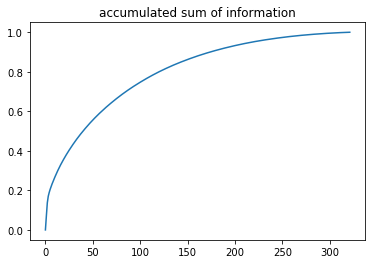

218 dimensions have a total accumulated information of 0.9502878459479628


In [8]:
[pca, votes_pca, optimal_dimensions] = calculateAndApplyPCA(train_data, show=True)
#[ss_pca, votes_pca] = scaleAllFeatures(votes_pca)#, ss=RobustScaler())

#X = votes_pca*pca.explained_variance_ratio_

In [9]:
#len(pca.explained_variance_ratio_)

In [10]:
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(votes_pca)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

2  - Silhouette Coefficient: 0.058
3  - Silhouette Coefficient: 0.059
4  - Silhouette Coefficient: 0.039
5  - Silhouette Coefficient: 0.046
6  - Silhouette Coefficient: 0.032
7  - Silhouette Coefficient: 0.032
8  - Silhouette Coefficient: 0.029
9  - Silhouette Coefficient: 0.026
10  - Silhouette Coefficient: 0.022
11  - Silhouette Coefficient: 0.025
12  - Silhouette Coefficient: 0.023
13  - Silhouette Coefficient: 0.025
14  - Silhouette Coefficient: 0.024
15  - Silhouette Coefficient: 0.016
16  - Silhouette Coefficient: 0.020
17  - Silhouette Coefficient: 0.014
18  - Silhouette Coefficient: 0.015
19  - Silhouette Coefficient: 0.014
20  - Silhouette Coefficient: 0.023
21  - Silhouette Coefficient: 0.006
22  - Silhouette Coefficient: 0.007
23  - Silhouette Coefficient: 0.011
24  - Silhouette Coefficient: 0.010
25  - Silhouette Coefficient: 0.006
26  - Silhouette Coefficient: 0.023
27  - Silhouette Coefficient: -0.001
28  - Silhouette Coefficient: 0.008
29  - Silhouette Coefficient: 0.016

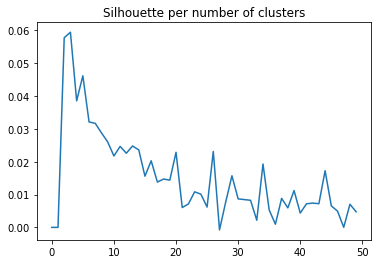

Best number of clusters: 3


In [11]:
max_clusters=50
random_state = 421
X = votes_pca
#X = train_data

silhouettes = np.zeros(max_clusters)
for i in range(2,max_clusters):
    model = KMeans(n_clusters=i, random_state=random_state)
    y_pred = model.fit_predict(X)
    silhouettes[i] = metrics.silhouette_score(X, y_pred)
    print(i, " - Silhouette Coefficient: %0.3f"
      % silhouettes[i])
    
fig, ax = plt.subplots()
ax.plot(silhouettes)
ax.set_title('Silhouette per number of clusters')
plt.show()
n_clusters = silhouettes.argmax()
print("Best number of clusters: "+str(n_clusters))

In [12]:

def plotCluster(X, y_pred):
    plt.figure(figsize=(12, 12))

    plt.subplot(421)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Dimensions: 0x1; Clusters: "+str(1+max(y_pred)))

    plt.subplot(422)
    plt.scatter(X[:, 0], X[:, 2], c=y_pred)
    plt.title("Dimensions: 0x2; Clusters: "+str(1+max(y_pred)))

    plt.subplot(423)
    plt.scatter(X[:, 0], X[:, 3], c=y_pred)
    plt.title("Dimensions: 0x3; Clusters: "+str(1+max(y_pred)))

    plt.subplot(424)
    plt.scatter(X[:, 0], X[:, 4], c=y_pred)
    plt.title("Dimensions: 0x4; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(425)
    plt.scatter(X[:, 0], X[:, 5], c=y_pred)
    plt.title("Dimensions: 0x5; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(426)
    plt.scatter(X[:, 0], X[:, 6], c=y_pred)
    plt.title("Dimensions: 0x6; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(427)
    plt.scatter(X[:, 0], X[:, 7], c=y_pred)
    plt.title("Dimensions: 0x7; Clusters: "+str(1+max(y_pred)))
    
    plt.subplot(428)
    plt.scatter(X[:, 0], X[:, 8], c=y_pred)
    plt.title("Dimensions: 0x8; Clusters: "+str(1+max(y_pred)))

    plt.show()

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, y_pred, sample_size=10000))

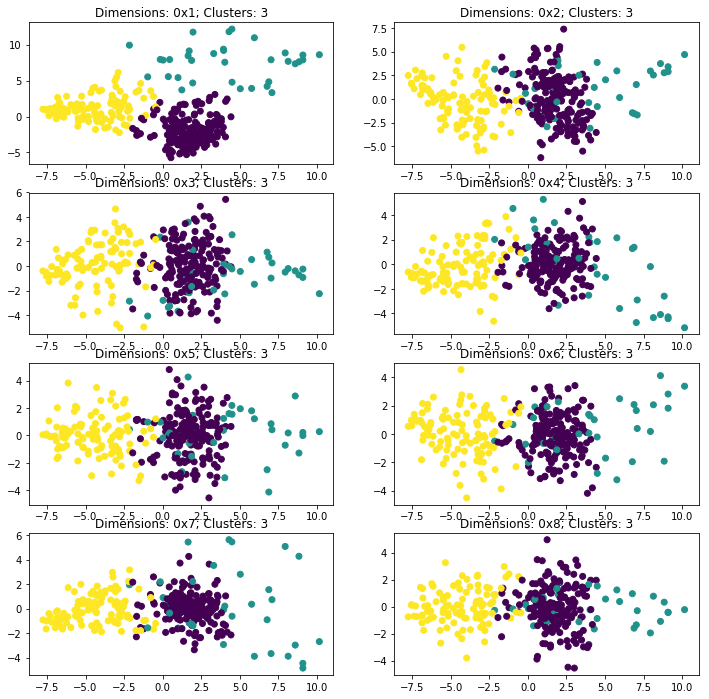

Silhouette Coefficient: 0.060


In [13]:
model = KMeans(n_clusters=3, random_state=42)
#y_pred = model.fit_predict(X)
y_pred = model.fit_predict(votes_pca)

#plotCluster(X, y_pred)
plotCluster(votes_pca, y_pred)

In [14]:
results = df.copy()
results['cluster'] = y_pred
results

,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
0,178957.0,Obstrução,null,Sim,Não,Sim,Sim,Sim,Não,Sim,...,null,null,Não,Sim,Não,Não,ABEL MESQUITA JR.,PDT,RR,0
2,178914.0,null,null,null,null,null,null,null,null,null,...,Sim,Não,Não,null,Sim,Não,ADALBERTO CAVALCANTI,PTB,PE,0
4,178968.0,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,...,Sim,Não,Não,null,Não,Não,ADELSON BARRETO,PTB,SE,0
5,133374.0,Não,null,Sim,Não,Não,Não,Não,Não,Não,...,NaN,NaN,NaN,NaN,NaN,NaN,ADEMIR CAMILO,PROS,MG,0
6,178903.0,null,Não,Sim,Sim,Sim,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT,2
7,141372.0,null,null,Sim,Não,Sim,Sim,Sim,Sim,Sim,...,null,Não,Não,null,Sim,Não,AELTON FREITAS,PR,MG,0
9,136811.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,null,Não,null,Sim,Sim,Não,AFONSO HAMM,PP,RS,2
10,178835.0,Sim,Sim,null,Não,Sim,Sim,Sim,Não,Sim,...,null,null,null,Não,null,null,AFONSO MOTTA,PDT,RS,1
11,160527.0,Sim,Sim,Sim,null,Sim,Sim,Sim,Sim,Sim,...,null,Não,null,Sim,Sim,null,AGUINALDO RIBEIRO,PP,PB,0
12,178836.0,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,...,null,null,Não,Sim,Sim,Não,ALAN RICK,PRB,AC,0


In [17]:
results[results.cluster==2]

,Unnamed: 0,6140,6184,6227,6325,6332,6333,6334,6335,6336,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
6,178903.0,null,Não,Sim,Sim,Sim,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,Sim,ADILTON SACHETTI,PSB,MT,2
9,136811.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,null,Não,null,Sim,Sim,Não,AFONSO HAMM,PP,RS,2
14,73579.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,null,ALBERTO FRAGA,DEM,DF,2
15,160559.0,null,Sim,Sim,Não,Não,Não,Não,Não,Não,...,Sim,Não,Não,null,Sim,Não,ALCEU MOREIRA,PMDB,RS,2
18,178972.0,null,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Não,Sim,Não,ALEX MANENTE,PPS,SP,2
46,160602.0,Obstrução,Não,Sim,null,null,null,null,null,null,...,null,Não,Não,Sim,Sim,null,ARNALDO JORDY,PPS,PA,2
55,73655.0,Não,Sim,Sim,Sim,Não,Não,Não,Não,Não,...,Não,Sim,Não,Sim,Não,Não,AUGUSTO CARVALHO,Solidaried,DF,2
56,160665.0,Sim,Não,Sim,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,Sim,null,AUGUSTO COUTINHO,Solidaried,PE,2
57,160512.0,null,null,null,Sim,Não,Não,Não,Não,Não,...,null,null,Não,Sim,Sim,null,AUREO,Solidaried,RJ,2
62,74535.0,Sim,Sim,null,Sim,Não,Não,Não,Não,Não,...,Sim,Não,Não,Sim,null,Não,BENITO GAMA,PTB,BA,2


In [292]:
results[results.cluster == 4]

,6140,6184,6227,6325,6332,6333,6334,6335,6336,6337,...,8365,8370,8374,8440,8538,8541,nome,partido,uf,cluster
178864,Sim,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Não,...,null,null,null,null,Sim,Sim,ADAIL CARNEIRO,PHS,CE,4
73458,null,null,Sim,null,Sim,null,null,Sim,Sim,null,...,null,null,Não,Sim,Sim,Não,ALEX CANZIANI,PTB,PR,4
160545,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,...,null,null,null,null,Sim,Não,ALEXANDRE LEITE,DEM,SP,4
178881,Sim,Sim,null,Não,Sim,Sim,Sim,Sim,Sim,Não,...,null,null,null,null,Sim,null,ALUISIO MENDES,PSDC,MA,4
178882,Sim,Sim,Sim,Não,Sim,Sim,Sim,Não,Sim,null,...,null,null,Não,null,null,null,ANDRÉ FUFUCA,PEN,MA,4
160543,Sim,null,null,null,null,null,null,null,null,null,...,null,null,null,null,Sim,null,ANDRE MOURA,PSC,SE,4
74212,Sim,Não,null,Não,Sim,Sim,Sim,Sim,null,null,...,null,null,Não,null,Sim,null,ANÍBAL GOMES,PMDB,CE,4
73584,null,null,Sim,null,null,null,null,null,null,null,...,null,null,null,null,null,null,ANTONIO CARLOS MENDES THAME,PSDB,SP,4
160541,null,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,null,...,null,null,null,null,Sim,Não,ARTHUR LIRA,PP,AL,4
160600,null,null,null,Sim,Não,Não,Não,Não,Não,null,...,Sim,Não,null,null,null,null,ARTHUR OLIVEIRA MAIA,Solidaried,BA,4
